In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [59]:
# Parameters (EC5)
m = 0.068 # (Kg)
g = 9.81 #(m/s^2)
k = 2*3.2654e-5 #(Nm^2/A^2) 
R = 1.0         # resistência (Ohm)

# Ponto de equilíbrio
x0 = 7.3e-3                                      # posição de equilíbrio (m)
i0 = 1.0                                         # corrente de equilíbrio (A)
u0 = R * i0                                      # tensão de equilíbrio (V)

print(f"Corrente de equilíbrio i0 = {i0:.4f} A")
print(f"Tensão de equilíbrio u0 = {u0:.4f} V")

Corrente de equilíbrio i0 = 1.0000 A
Tensão de equilíbrio u0 = 1.0000 V


In [60]:
# Força magnética
def f_m(i, x):
    return (k/2) * (i**2/x**2)

# Fator Bl
def Bl(i, x):
    return f_m(i,x)/i

# Indutância (assumida constante)
def L(x):
    return 0.01  # H


In [61]:
# Ganhos do PID
Kp = 190
Ki = 20
Kd = 20

# Função do sistema dinâmico com controle PID
def f(t, y):
    i, x, v, E = y  # corrente, posição, velocidade, erro acumulado
    e = x - x0      # erro de posição
    der_e = v       # derivada do erro (dx/dt)
    int_e = E       # integral do erro acumulado

    delta_u = Kp * e + Ki * int_e + Kd * der_e
    u = u0 + delta_u

    di_dt = (u - R * i - Bl(i, x) * v) / L(x)
    dx_dt = v
    dv_dt = g - f_m(i, x) / m
    dE_dt = e

    return [di_dt, dx_dt, dv_dt, dE_dt]


In [62]:
# Condições iniciais

y0 = [i0, x0, 0.0, 0.0]  # [corrente, posição, velocidade, erro acumulado]
t0, tf = 0, 30           # intervalo de simulação
t_eval = np.linspace(t0, tf, 1000)

# Simulação numérica com Runge-Kutta 4(5)
sol = solve_ivp(f, (t0, tf), y0, t_eval=t_eval)

# Extração dos resultados
t = sol.t
i = sol.y[0]
x = sol.y[1]
v = sol.y[2]


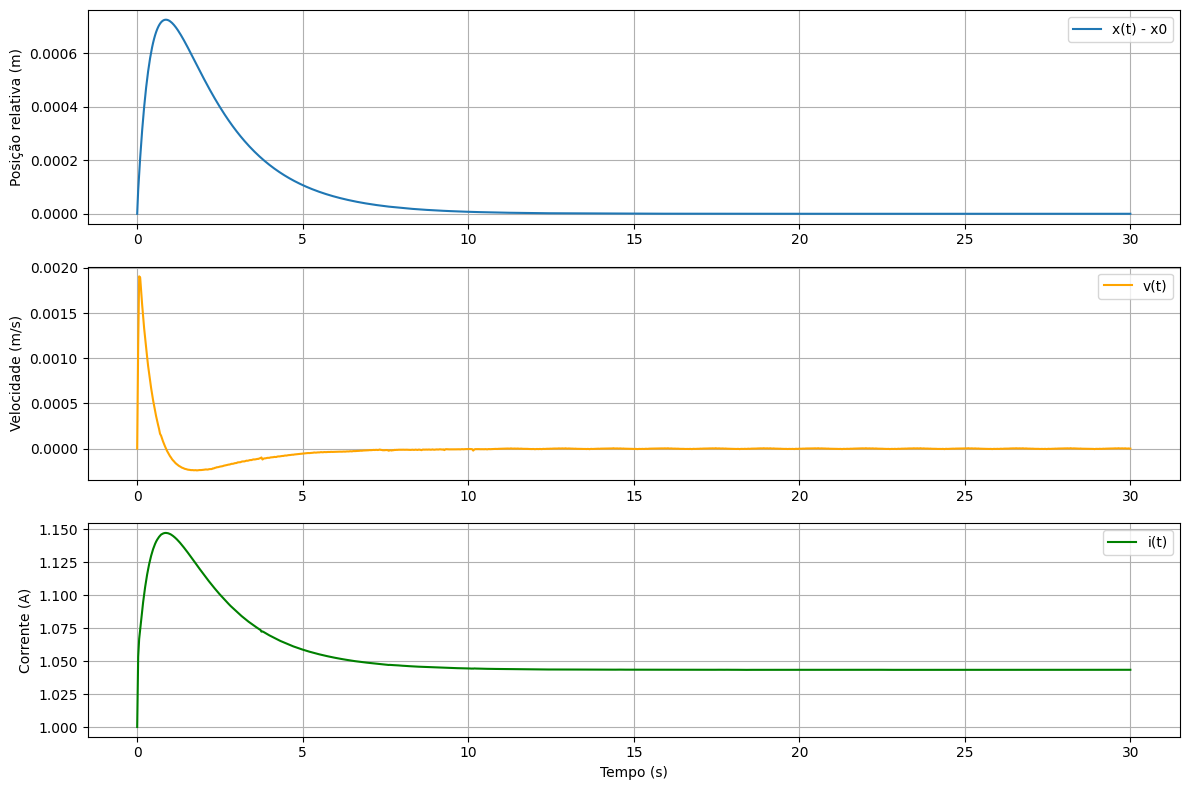

In [63]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, x - x0, label='x(t) - x0')
plt.ylabel('Posição relativa (m)')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, v, label='v(t)', color='orange')
plt.ylabel('Velocidade (m/s)')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, i, label='i(t)', color='green')
plt.xlabel('Tempo (s)')
plt.ylabel('Corrente (A)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


# Análise de Estabilidade